## Observations and Insights 

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress

#hide warning msgs
import warnings
warnings.filterwarnings('ignore')

#files to load
mouse_drug_data_load = "data/Mouse_metadata.csv"
clinical_trial_data_load = "data/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_drug_data_load)
study_results = pd.read_csv(clinical_trial_data_load)

#Combine the data into a single dataset

complete_clinical_data = pd.merge(study_results, mouse_metadata, how="outer", on=["Mouse ID", "Mouse ID"])

#Display the data table for preview

complete_clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [113]:
# Checking the number of mice.
clinical_data = complete_clinical_data["Mouse ID"].value_counts()
clinical_data = len(clinical_data)
clinical_data
#check


249

In [114]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = complete_clinical_data.loc[complete_clinical_data.duplicated(subset=['Mouse ID','Timepoint',]),'Mouse ID'].unique()

In [115]:
# Optional: Get all the data for the duplicate mouse ID. 
full_mice_set = pd.DataFrame(dup_mice)
full_mice_set


,0
0,g989


In [116]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = complete_clinical_data[complete_clinical_data['Mouse ID'].isin(dup_mice)==False]
clean_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [117]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_mice_df["Mouse ID"].value_counts()
clean_num_mice = len(clean_mice)
clean_num_mice

248

## Summary Statistics

In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_vol_mean = complete_clinical_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_vol_mean

tumor_vol_median = complete_clinical_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_vol_median

tumor_vol_variance = complete_clinical_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_vol_variance

tumor_vol_std = complete_clinical_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_vol_std

tumor_vol_sem = complete_clinical_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
tumor_vol_sem

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary dataframe.

tumor_sum_stats = pd.DataFrame({"Mean": tumor_vol_mean,
                               "Median": tumor_vol_median,
                               "Variance": tumor_vol_variance,
                               "Std Dev": tumor_vol_std,
                               "SEM":tumor_vol_sem})
tumor_sum_stats

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tum_vol_stats = complete_clinical_data.groupby('Drug Regimen')
sum_stats_agg_add = tum_vol_stats.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
sum_stats_agg_add


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

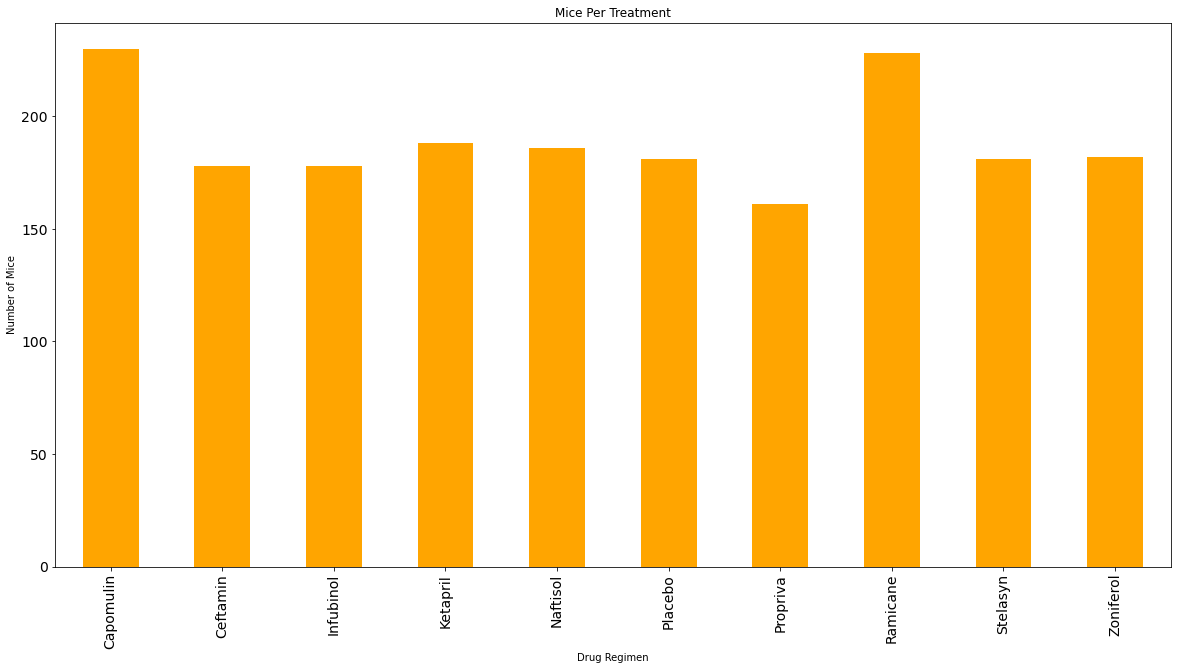

In [120]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mice_per_drug = complete_clinical_data.groupby(['Drug Regimen']).count()["Mouse ID"]
plot_mice = mice_per_drug.plot.bar(figsize=(20,10), color = "orange", fontsize = 14)
plt.title("Mice Per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout
plt.show()

Text(0.5, 1.0, 'Mice Per Treatment')

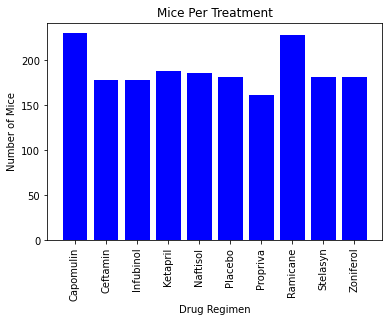

In [121]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
mice_per_drug = complete_clinical_data.groupby(['Drug Regimen']).count()["Mouse ID"]
#mice_per_drug
x_axis = np.arange(len(mice_per_drug))
plt.bar(x_axis, mice_per_drug, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drugs, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mice Per Treatment")


Text(0, 0.5, 'Sex')

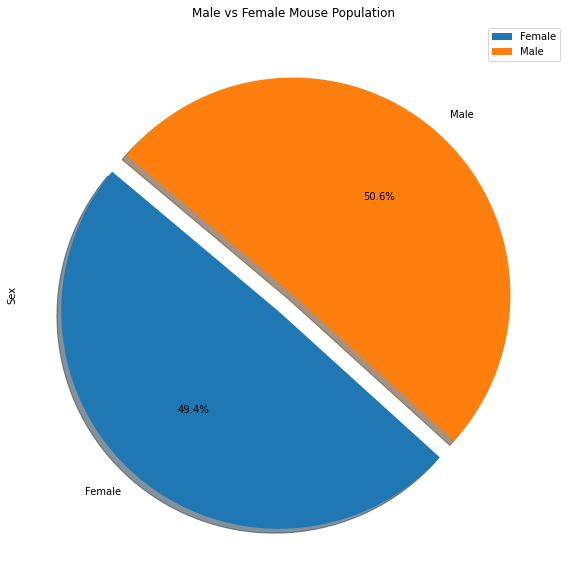

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#get data
gender_groups = complete_clinical_data.groupby(['Sex']).count()['Mouse ID']
gender_groups = pd.DataFrame(gender_groups)
#gender_groups
explode= (0.1,0)

pie_chart = gender_groups.plot.pie(y='Mouse ID',figsize=(10,10), startangle=140, explode = explode, shadow= True, autopct="%1.1f%%")
plt.title("Male vs Female Mouse Population")
plt.ylabel("Sex")


Text(0, 0.5, 'Sex')

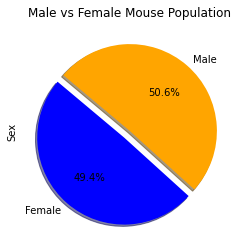

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#make labels
labels = ["Female","Male"]
#make sizes
sizes = [935, 958]
#colors
colors = ["Blue","Orange"]
#explode the chart
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male vs Female Mouse Population")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_data = complete_clinical_data.loc[complete_clinical_data["Drug Regimen"] == "Capomulin",:]
Ramicane_data = complete_clinical_data.loc[complete_clinical_data["Drug Regimen"] == "Ramicane", :]
Infubinol_data = complete_clinical_data.loc[complete_clinical_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_data = complete_clinical_data.loc[complete_clinical_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse

Capomulin_last = Capomulin_data.groupby('Mouse ID').max()['Timepoint']
Ramicane_last = Ramicane_data.groupby('Mouse ID').max()['Timepoint']
Infubinol_last = Infubinol_data.groupby('Mouse ID').max()['Timepoint']
Ceftamin_last = Ceftamin_data.groupby('Mouse ID').max()['Timepoint']


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_df = pd.DataFrame(Capomulin_last)
Ramicane_df = pd.DataFrame(Ramicane_last)
Infubinol_df = pd.DataFrame(Infubinol_last)
Ceftamin_df = pd.DataFrame(Ceftamin_last)

Capomulin_merge = pd.merge(Capomulin_df, complete_clinical_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge = pd.merge(Ramicane_df, complete_clinical_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge = pd.merge(Infubinol_df, complete_clinical_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge = pd.merge(Ceftamin_df, complete_clinical_data, on=("Mouse ID","Timepoint"),how="left")


In [125]:
# Put treatments into a list for for loop (and later for plot labels)
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

Capomulin_quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq_capomulin = quartiles[0.25]
upperq_capomulin = quartiles[0.75]
iqr = upperq-lowerq

Ramicane_quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq_ramicane = quartiles[0.25]
upperq_ramicane = quartiles[0.75]
iqr = upperq-lowerq

Infubinol_quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq_infubinol = quartiles[0.25]
upperq_infubinol = quartiles[0.75]
iqr = upperq-lowerq

Ceftamin_quartiles =Ceftamin_tumors.quantile([.25,.5,.75])
lowerq_ceftamin = quartiles[0.25]
upperq_ceftamin = quartiles[0.75]
iqr = upperq-lowerq

# Capomulin_quartiles
# Ramicane_quartiles
# Infubinol_quartiles
# Ceftamin_quartiles

# Locate the rows which contain mice on each drug and get the tumor volumes
    
    
# add subset 
    
# Determine outliers using upper and lower bounds

lower_bound_capomulin = lowerq_capomulin - (1.5*iqr)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr)

lower_bound_ramicane = lowerq_ramicane - (1.5*iqr)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr)

lower_bound_infubinol = lowerq_infubinol - (1.5*iqr)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr)

lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr)

print(f"Values below {lower_bound_capomulin} could be outliers.")
print(f"Values above {upper_bound_capomulin} could be outliers.")
print(f"Values below {lower_bound_ramicane} could be outliers.")
print(f"Values above {upper_bound_ramicane} could be outliers.")
print(f"Values below {lower_bound_infubinol} could be outliers.")
print(f"Values above {upper_bound_infubinol} could be outliers.")
print(f"Values below {lower_bound_infubinol} could be outliers.")
print(f"Values above {upper_bound_infubinol} could be outliers.")

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


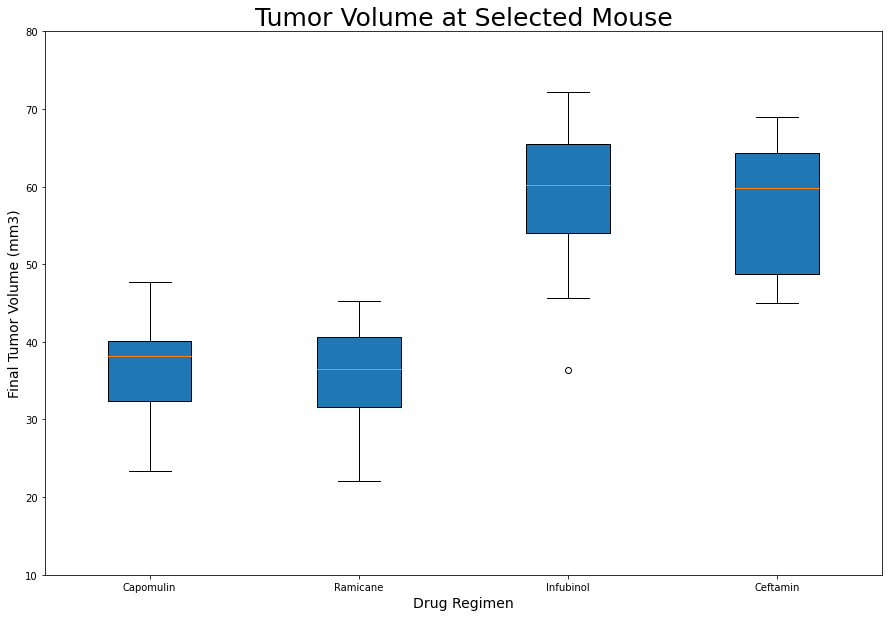

In [126]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.show()

## Line and Scatter Plots

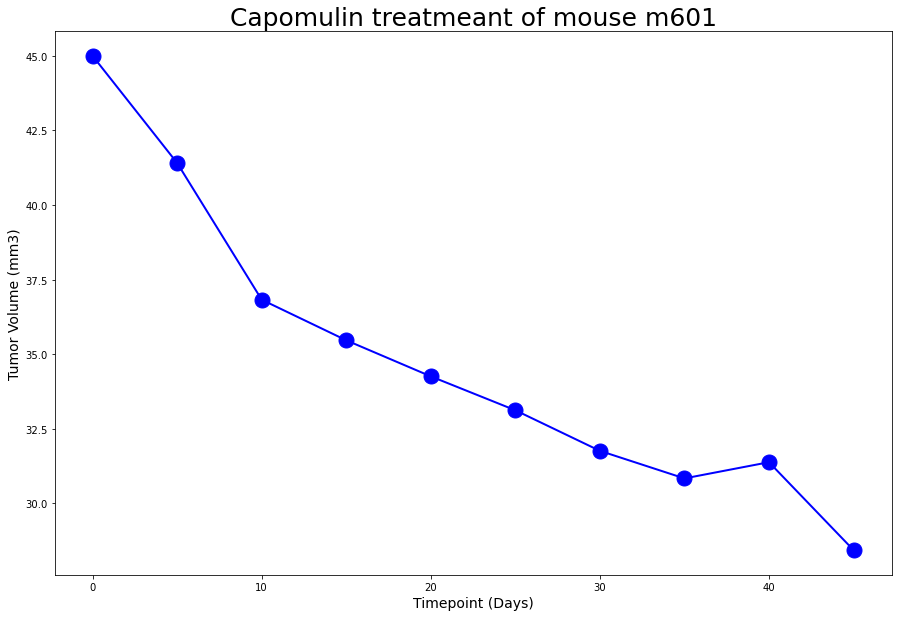

In [127]:
#Get Data for 1 mouse with Capomulin

forline_data = Capomulin_data.loc[Capomulin_data["Mouse ID"] == "m601",:]
forline_data.head()

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = forline_data["Timepoint"]
tumsiz = forline_data["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse m601',fontsize =25)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)

plt.show()

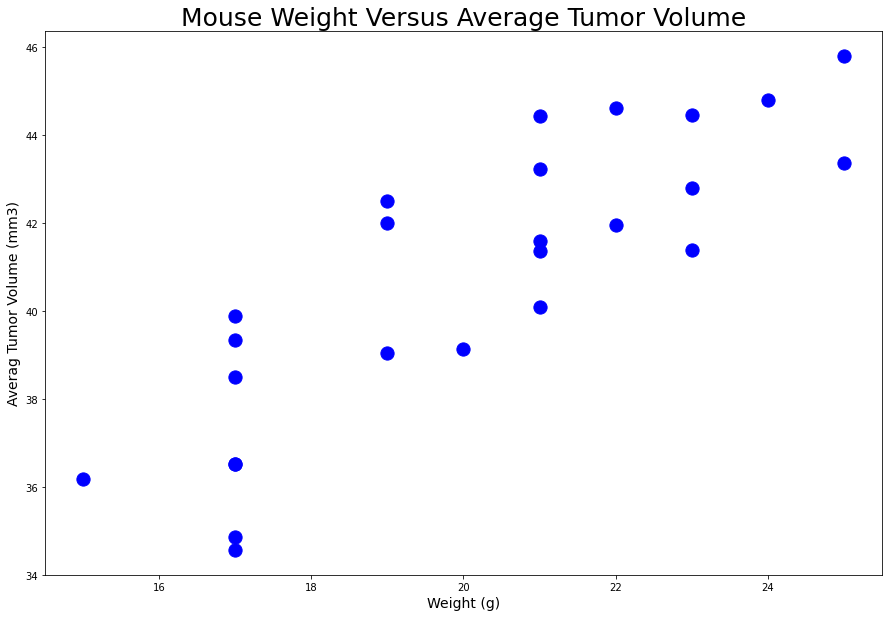

In [128]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capm_vol =Capomulin_data.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)

plt.show()

## Correlation and Regression

In [132]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The relationship between mouse weight and tumor volume is {corr}")

The relationship between mouse weight and tumor volume is 0.84


In [130]:
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134
y = 0.95x + 21.55
